# Classifiers

In [1]:
# Important packages
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
currency = "USDCHF"

In [3]:
df = pd.read_parquet('../Dataframes/df_' + currency + '.parquet.gzip')

In [4]:
# Make date the index
df.index = df["date"]
df.drop(["date"], axis=1, inplace=True)

In [5]:
df.head()

,open,high,low,close,delta,slope_3,slope_4,slope_5,slope_10,slope_20,...,roc_13,roc_14,roc_15,wcp_15,macd_15_30,cci_15,hi_avg_2,lo_avg_2,hilo_avg_2,hilo_avg
date,,,,,,,,,,,,,,,,,,,,,
11/2/2000,1.6300,1.6399,1.6250,1.6249,0.0,186.877076,-60.668894,-169.372463,-239.644299,181.616555,...,0.837781,1.556250,1.050995,1.625115,0.013908,-5.543634,1.63610,1.62045,1.628275,1.63245
14/2/2000,1.6249,1.6448,1.6195,1.6436,1.0,157.549786,203.849364,102.231466,-231.796192,177.422888,...,2.061600,1.998262,2.725000,1.626710,0.014161,17.908963,1.64235,1.62225,1.632300,1.63215
15/2/2000,1.6436,1.6441,1.6285,1.6360,0.0,299.003322,203.849364,250.456760,-215.694318,170.938026,...,0.214395,1.589667,1.526623,1.627890,0.013794,8.417617,1.64445,1.62400,1.634225,1.63630
16/2/2000,1.6360,1.6397,1.6248,1.6255,0.0,-333.624073,-29.697316,191.702317,-205.741105,156.266507,...,-1.329367,-0.428790,0.937655,1.628013,0.012748,-53.821834,1.64190,1.62665,1.634275,1.63225
17/2/2000,1.6255,1.6303,1.6112,1.6235,0.0,-138.851623,-179.095549,-181.679526,-228.850801,115.047013,...,-1.992152,-1.450771,-0.551302,1.627277,0.011668,-119.882934,1.63500,1.61800,1.626500,1.62075


In [6]:
# Make df['delta'] the expected output
target = df['delta']
df.drop(['delta'], axis = 1, inplace = True)

In [7]:
# Features
feat_labels = ['open', 'high', 'low', 'close', 'wclose', 'so_3', 'so_4', 'so_5',
       'so_8', 'so_9', 'so_10', 'wr_6', 'wr_7', 'wr_8', 'wr_9', 'wr_10',
       'roc_12', 'roc_13', 'roc_14', 'roc_15', 'wcp_15', 'macd_15_30',
       'cci_15', 'hi_avg_2', 'lo_avg_2', 'hilo_avg_2', 'hilo_avg', 'slope_3',
       'slope_4', 'slope_5', 'slope_10', 'slope_20', 'slope_30']

## Random Forest Classifier

#### All features

In [8]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

rf_model = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)

rf_model.fit(X_train, y_train)

print("RandomForest accuracy : ",accuracy_score(y_test, rf_model.predict(X_test), normalize = True))

RandomForest accuracy :  0.7378516624040921


#### Features Selection

In [9]:
top_n_features = 10

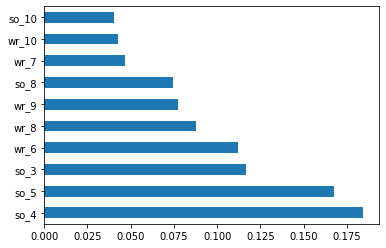

In [10]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(top_n_features).plot(kind='barh')
plt.show()

In [11]:
top_feats = list(feat_importances.nlargest(top_n_features).index)
df2 = df[top_feats]

#### Top N Features

In [12]:
# Train and Test samples
train_size = int(len(df2) * 0.7)
X_train, X_test = df2[:train_size], df2[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

rf_model = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)

rf_model.fit(X_train, y_train)

print("RandomForest accuracy : ",accuracy_score(y_test, rf_model.predict(X_test), normalize = True))

RandomForest accuracy :  0.7583120204603581


In [13]:
rf_pred = rf_model.predict(df2)

## Support Vector Machine Classifier (with RBF kernel)

In [14]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

svm_model = SVC(kernel='rbf',random_state=0, gamma='auto')

svm_model.fit(X_train, y_train)

print("RBF-SVC accuracy : ",accuracy_score(y_test, svm_model.predict(X_test), normalize = True))

RBF-SVC accuracy :  0.4673913043478261


In [15]:
svm_pred = svm_model.predict(df)

## XGBoost

#### All Features

In [16]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

boost_model = XGBClassifier()

boost_model.fit(X_train, y_train)

print("XGBoost accuracy : ",accuracy_score(y_test, boost_model.predict(X_test), normalize = True))

XGBoost accuracy :  0.8120204603580563


#### Features Selection

In [17]:
top_n_features = 10

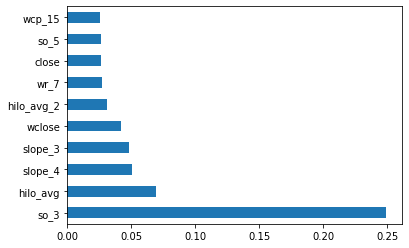

In [18]:
feat_importances = pd.Series(boost_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(top_n_features).plot(kind='barh')
plt.show()

In [19]:
top_feats = list(feat_importances.nlargest(top_n_features).index)
df2 = df[top_feats]

#### Top N Features

In [20]:
# Train and Test samples
train_size = int(len(df2) * 0.7)
X_train, X_test = df2[:train_size], df2[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

boost_model = XGBClassifier()

boost_model.fit(X_train, y_train)

print("XGBoost accuracy : ",accuracy_score(y_test, boost_model.predict(X_test), normalize = True))

XGBoost accuracy :  0.80306905370844


In [21]:
boost_pred = boost_model.predict(df2)

## Logistic Regression to form meta classifier

In [22]:
dataset = pd.DataFrame({'RandomForest':rf_pred, 
                        #'SVM':svm_pred, 
                        'XGBoost':boost_pred}, 
                       columns=['RandomForest', 'XGBoost'])
dataset.head(n=5)

,RandomForest,XGBoost
0,1.0,0.0
1,1.0,1.0
2,1.0,0.0
3,0.0,0.0
4,1.0,0.0


In [23]:
# Train and Test samples
train_size = int(len(dataset) * 0.7)
X_train, X_test = dataset[:train_size], dataset[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

regressor = LogisticRegression(solver='lbfgs')

regressor.fit(X_train, y_train)

print("Logistic Regression accuracy : ",accuracy_score(y_test, regressor.predict(X_test), normalize = True))

Logistic Regression accuracy :  0.80306905370844


In [24]:
# Note how the accuracy is exactly the same as the XGBoost accuracy, this means that the model is simply spitting out the XGBoost model predictions, as confirmed by the .coef_

In [25]:
regressor.coef_

array([[0.54940113, 8.89583471]])

In [26]:
ohls=df[['open','high','low','close']]

In [27]:
ohls.shape

(5212, 4)

In [28]:
ohls.head()

,open,high,low,close
date,,,,
11/2/2000,1.6300,1.6399,1.6250,1.6249
14/2/2000,1.6249,1.6448,1.6195,1.6436
15/2/2000,1.6436,1.6441,1.6285,1.6360
16/2/2000,1.6360,1.6397,1.6248,1.6255
17/2/2000,1.6255,1.6303,1.6112,1.6235


In [29]:
alpha_df=ohls[train_size:]

In [30]:
regressor.predict(X_test)

array([0., 0., 0., ..., 0., 0., 1.])

In [31]:
alpha_df['delta']=regressor.predict(X_test)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
alpha_df.head(n=10)

,open,high,low,close,delta
date,,,,,
5/2/2014,0.9037,0.9057,0.9004,0.9035,0.0
6/2/2014,0.9035,0.9064,0.8968,0.9010,0.0
7/2/2014,0.9010,0.9022,0.8961,0.8982,0.0
10/2/2014,0.8982,0.9000,0.8960,0.8968,0.0
11/2/2014,0.8968,0.8988,0.8940,0.8983,0.0
12/2/2014,0.8983,0.9038,0.8968,0.9006,0.0
13/2/2014,0.9006,0.9010,0.8918,0.8934,0.0
14/2/2014,0.8934,0.8941,0.8903,0.8927,0.0
17/2/2014,0.8927,0.8935,0.8901,0.8915,0.0


In [33]:
alpha_df.iloc[2]['delta']

0.0

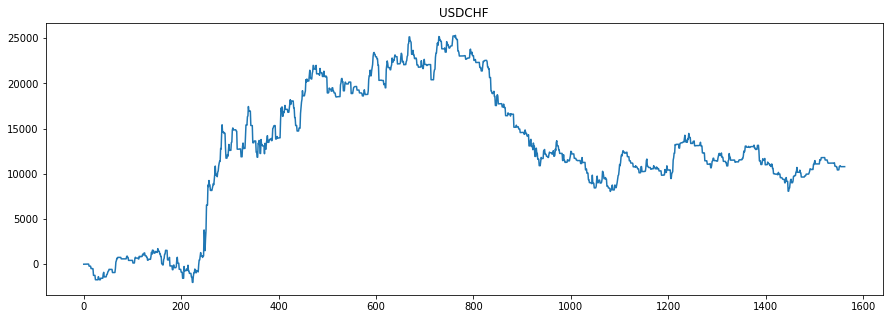

new capital:  110788.39123148289 cumulative_profit:  10788.391231482772


In [35]:
capital=100000
cumulative_profit = 0
unit_per_trade = 1000
daily_pnl = []
for i in range(len(alpha_df)-1):
    curr_delta=alpha_df.iloc[i]['delta']
    shares = capital // alpha_df.iloc[i+1]['open']
    change = 0
    if curr_delta == 1:
        change = (alpha_df.iloc[i+1]['close']-alpha_df.iloc[i+1]['open']) * shares
        capital += change
        cumulative_profit += change
    else:
        change = ((alpha_df.iloc[i+1]['open']-alpha_df.iloc[i+1]['close'])/alpha_df.iloc[i+1]['open'])*unit_per_trade
        capital += change
        cumulative_profit += change
    daily_pnl.append(change)    
    
daily_pnl = np.array(daily_pnl)
plt.figure(figsize=(15, 5))
plt.plot(daily_pnl.cumsum())
plt.title(currency)
plt.show()
print ("new capital: ", capital, "cumulative_profit: ", cumulative_profit)

In [36]:
# calculate sharpe ratio

sharpe = np.sqrt(252) * (daily_pnl.mean()) / (daily_pnl.std())
sharpe

0.2855602468939657

In [37]:
# calculate win/loss ratio

wins = 0
losses = 0

length = len(daily_pnl)

for i in range(length):
    if daily_pnl[i] > 0:
        wins += 1
    elif daily_pnl[i] < 0:
        losses += 1

wl = wins / losses
wl

0.92625

In [38]:
# maximum drawdown
cumsum = daily_pnl.cumsum()
maxm = 0
drawdown = 0
cur_low = 0
size = len(cumsum)

final_start = 0
final_end = 0

start_date = 0
end_date = 0

for i in range(1, size):
    cur_val = cumsum[i]
    if cur_val >= maxm:
        
        drawdown = max(drawdown, maxm - cur_low)
        
        if drawdown == maxm - cur_low:
            final_start = start_date
            final_end = end_date
            
        maxm = cur_val
        cur_low = cur_val
        
        start_date = i
    else:
        cur_low = min(cur_low, cur_val)
        if cur_low == cur_val:
            end_date = i

print('drawdown is:', drawdown, ', from day', final_start, ', to day', final_end)

drawdown is: 5607.106957093225 , from day 338 , to day 357
